# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
from scipy.stats import pearsonr, linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results,mouse_metadata, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
study_data_complete


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_mice = study_data_complete['Mouse ID'].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
update_data_complete = study_data_complete.set_index(['Mouse ID', 'Timepoint'])
update_data_complete 
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the unique duplicate mice IDs
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Print the duplicate mice IDs
#duplicate_mice_ids
update_data_complete 

,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = update_data_complete.loc[duplicate_mice_ids]
duplicate_mouse_data                                          

Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
g989     0                   45.000000                 0     Propriva  Female   
         0                   45.000000                 0     Propriva  Female   
         5                   48.786801                 0     Propriva  Female   
         5                   47.570392                 0     Propriva  Female   
         10                  51.745156                 0     Propriva  Female   
         10                  49.880528                 0     Propriva  Female   
         15                  51.325852                 1     Propriva  Female   
         15                  53.442020                 0     Propriva  Female   
         20                  55.326122                 1     Propriva  Female   
         20                  54.657650                 1     Propriva  Female   
         25                  56.045564                 1     Propriva  Female   
         30                  59.082294                 1     Propriva  Female   
         35                  62.570880                 2     Propriva  Female   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                  21          26  
         0                  21          26  
         5                  21          26  
         5                  21          26  
         10                 21          26  
         10                 21          26  
         15                 21          26  
         15                 21          26  
         20                 21          26  
         20                 21          26  
         25                 21          26  
         30                 21          26  
         35                 21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_by_mouse_id = study_data_complete.drop_duplicates(subset=['Mouse ID'], keep='first')
clean_data_by_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_by_mouse_id['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean of Tumor').to_frame()
summary_statistics['Median of Tumor'] = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_statistics['Variance of Tumor'] = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_statistics['Standard Deviation of Tumor'] = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_statistics['SEM of Tumor'] = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics

,Mean of Tumor,Median of Tumor,Variance of Tumor,Standard Deviation of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_groupby_drugregimen = study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_simple = summary_statistics_groupby_drugregimen.rename(columns={
                                                                   'mean':'Mean Tumor Volume',
                                                                   'median' : 'Median Tumor Volume',
                                                                   'var' : 'Tumor Volume Variance',
                                                                   'std' : 'Tumor Volume Std. Dev.',
                                                                   'sem' : 'Tumor Volume Std. Err.'
})
summary_statistics_simple

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

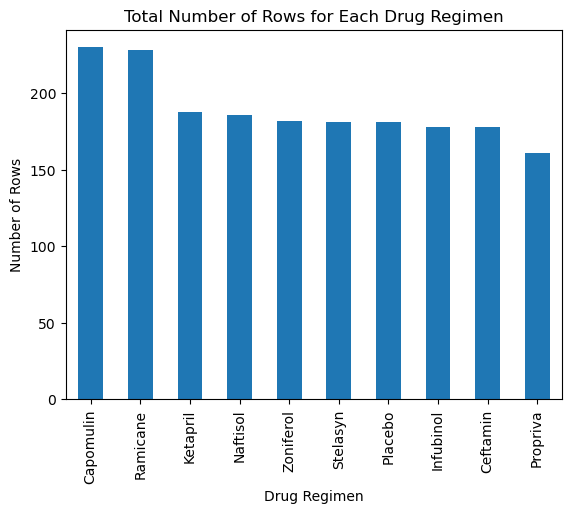

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = study_data_complete['Drug Regimen'].value_counts()

# Plot
regimen_counts.plot(kind='bar')

# Set axes labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()


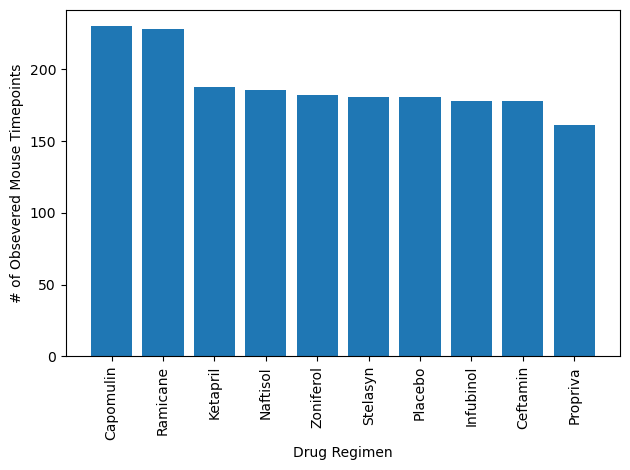

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_pos = range(len(regimen_counts))

# Create the bar plot
plt.bar(x_pos, regimen_counts)

# Set the tick labels for x-axis
plt.xticks(x_pos, regimen_counts.index, rotation='vertical')

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Obsevered Mouse Timepoints')

# Display the plot
plt.tight_layout()
plt.show()

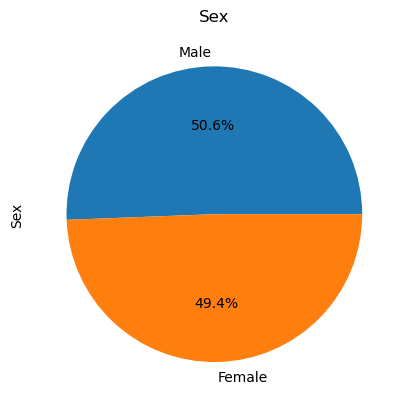

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = study_data_complete['Sex'].value_counts()
# Generate plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')
# Title
plt.title('Sex')
# Display
plt.show()

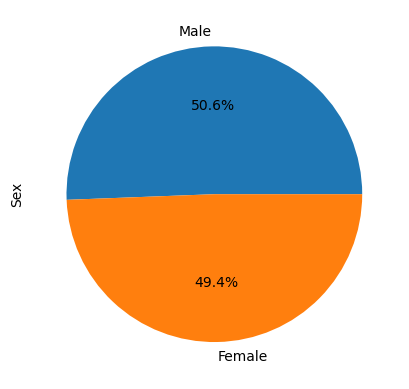

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
# Set title
plt.ylabel('Sex')
# Display
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_data_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(max_timepoint, study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')
tumor_volume



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop over each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    new_tumor_volume = tumor_volume[tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(new_tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = new_tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles.loc[0.25]
    upper_quartile = quartiles.loc[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    potential_outliers = new_tumor_volume[(new_tumor_volume < lower_bound) | (new_tumor_volume > upper_bound)]

    # Print the potential outliers for each treatment regimen
    print(f"{regimen}'s potential outliers:{potential_outliers}")

    # Add the potential outliers to the outliers list
    outliers = []
    outliers.append(potential_outliers)


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


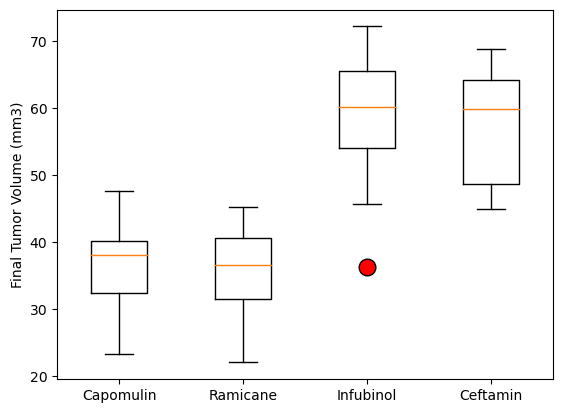

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Iterate over each treatment regimen
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black','markersize': 12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

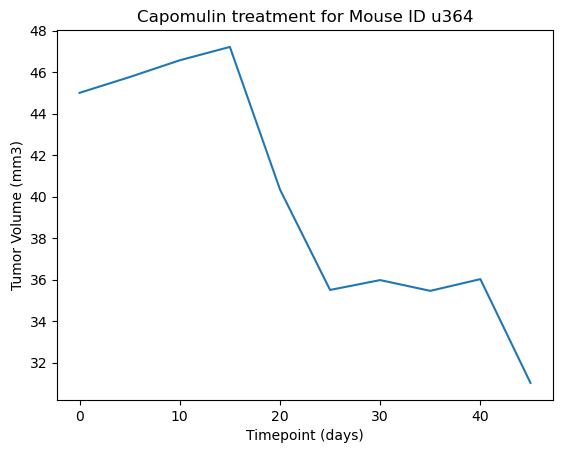

Run code again to get another mouse data


In [16]:
# DF of Drug Regimen = 'Capomulin'
capomulin_df = study_data_complete[study_data_complete['Drug Regimen'] == 'Capomulin']
#Random unique mice
unique_mice = capomulin_df['Mouse ID'].unique()
random_mouse = random.choice(unique_mice)
mouse_id = random_mouse
# Df for plot
capomulin_data = study_data_complete[(study_data_complete['Mouse ID'] == mouse_id) & (study_data_complete['Drug Regimen'] == 'Capomulin')]
# Plot the tumor volume vs. time point for the selected mouse
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Set the x-axis and y-axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the plot title
plt.title(f"Capomulin treatment for Mouse ID {mouse_id}")

# Show the plot
plt.show()
print("Run code again to get another mouse data")

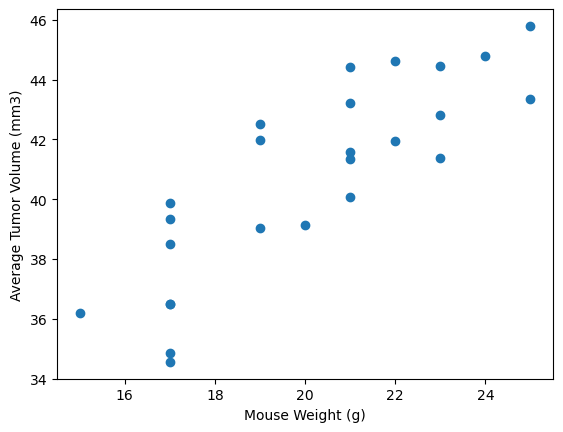

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_data_new = pd.merge(capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), avg_tumor_volume, on='Mouse ID')
plt.scatter(capomulin_data_new['Weight (g)'], capomulin_data_new['Tumor Volume (mm3)'])

# Set the x-axis and y-axis labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Set the plot title

# Show the plot
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8343958614425957
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


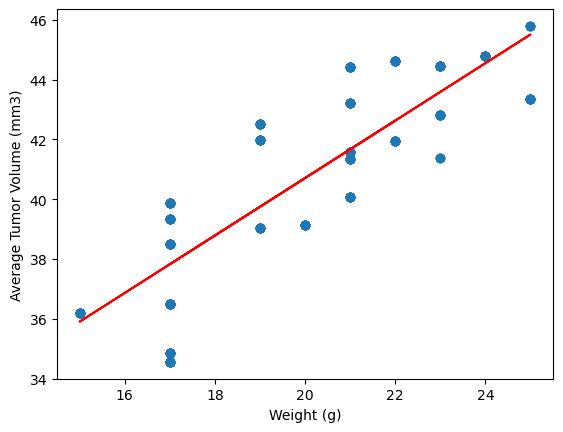

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the corresponding mouse weights
merged_data = pd.merge(capomulin_df[['Mouse ID', 'Weight (g)']], avg_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coef, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coef}")

# Scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Linear
slope, intercept, _, _, _ = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
regression_values = merged_data['Weight (g)'] * slope + intercept

# Plot 
plt.plot(merged_data['Weight (g)'], regression_values, color='red')

# Set labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()